In [ ]:
# Example notebook to post-process and combine WRF results for downstream wake predictions

# The example shown is for downstream wake in a wind farm in the small Denmark domain found by clustering
# for wind velocity on the small denmark domain

# The code for the other clusters would be the same but the data read in would be different

In [1]:
# import necessary packages

import pandas as pd
import numpy as np
import glob
import pylab as plt
import random

from scipy.interpolate import interp2d

In [2]:
# read in labels determined from clustering
df_wind_d02 = pd.read_csv('labels_all_6_wind_d02.csv')
df_2007_wind_d02 = df_wind_d02[df_wind_d02['Year'] == 2007].reset_index(drop = True)

# read in norm of initial wind velocity at location of hypothetical wind farm
df_vel_norm = pd.read_csv('vel_avg_norm.csv')
# read in angle of initial wind velocity at location of hypothetical wind farm
df_vel_angle = pd.read_csv('vel_angle.csv')

# read in arbitrary file to get location of wind farm array
farm_array = np.load("/rds/general/project/wrfwindpower/live/wrf_results_square/fixed_farm/200701_01/power.npy")

combined = pd.concat([df_2007_wind_d02, df_vel_norm, df_vel_angle], join = 'inner', axis = 1)


In [3]:
# read in outputs from WRF simulations for whole of 2007 - this is what we use as the truth

fname_fixed_list = []
fname_fixed_diff_u_list = []
fname_fixed_u_list = []
fname_fixed_v_list = []
power_fixed_list = []
diff_fixed_u_list = []
fixed_u_list = []
fixed_v_list = []

path = "/rds/general/project/wrfwindpower/live/wrf_results_square/fixed_farm/*/"
path_txt = str(path) + '/power.npy'
for fname in glob.glob(path_txt):
    fname_fixed_list.append(fname)

fname_fixed_list.sort()

for i in fname_fixed_list:
    power_fixed_list.append(np.load(i))

path_txt = str(path) + '/diff_u.npy'
for fname in glob.glob(path_txt):
    fname_fixed_diff_u_list.append(fname)

fname_fixed_diff_u_list.sort()
for i in fname_fixed_diff_u_list:
    diff_fixed_u_list.append(np.load(i))
    
path_txt = str(path) + '/u_diff.npy'
for fname in glob.glob(path_txt):
    fname_fixed_u_list.append(fname)

fname_fixed_u_list.sort()
for i in fname_fixed_u_list:
    fixed_u_list.append(np.load(i))
    
path_txt = str(path) + '/v_diff.npy'
for fname in glob.glob(path_txt):
    fname_fixed_v_list.append(fname)

fname_fixed_v_list.sort()
for i in fname_fixed_v_list:
    fixed_v_list.append(np.load(i))

In [4]:
# load in WRF outputs for the closest datapoints to the cluster centres for cluster found by clustering
# on wind velocity on small Denmark domain

def load_file(folder_init, file_init):
    folder = '/rds/general/project/wrfwindpower/live/' + folder_init
    cluster_0 = np.load(folder + '_0/' + file_init + '.npy')
    cluster_1 = np.load(folder + '_1/' + file_init + '.npy')
    cluster_2 = np.load(folder + '_2/' + file_init + '.npy')
    cluster_3 = np.load(folder + '_3/' + file_init + '.npy')
    cluster_4 = np.load(folder + '_4/' + file_init + '.npy')
    cluster_5 = np.load(folder + '_5/' + file_init + '.npy')
    
    return cluster_0, cluster_1, cluster_2, cluster_3, cluster_4, cluster_5

u_diff_cluster_0, u_diff_cluster_1, u_diff_cluster_2,\
    u_diff_cluster_3, u_diff_cluster_4, u_diff_cluster_5 = load_file('wrf_results_mv_new', 'fixed_sq_farm/u_diff')

v_diff_cluster_0, v_diff_cluster_1, v_diff_cluster_2,\
    v_diff_cluster_3, v_diff_cluster_4, v_diff_cluster_5 = load_file('wrf_results_mv_new', 'fixed_sq_farm/v_diff')

power_cluster_0, power_cluster_1, power_cluster_2,\
    power_cluster_3, power_cluster_4, power_cluster_5 = load_file('wrf_results_mv_new', 'fixed_sq_farm/power')

u1_cluster_0, u1_cluster_1, u1_cluster_2,\
    u1_cluster_3, u1_cluster_4, u1_cluster_5 = load_file('wrf_results_mv_new', 'fixed_sq_farm/u')

u2_cluster_0, u2_cluster_1, u2_cluster_2,\
    u2_cluster_3, u2_cluster_4, u2_cluster_5 = load_file('wrf_results_mv_new', 'fixed_sq_farm/v')

# estimate the norm of the velocity at the location of the wind farm
norm_vel_0 = np.sqrt((u1_cluster_0[0, 11, :, :72])**2 + (u2_cluster_0[0, 11, :153, :])**2)[farm_array[-1]!=0].mean()
norm_vel_1 = np.sqrt((u1_cluster_1[0, 11, :, :72])**2 + (u2_cluster_1[0, 11, :153, :])**2)[farm_array[-1]!=0].mean()
norm_vel_2 = np.sqrt((u1_cluster_2[0, 11, :, :72])**2 + (u2_cluster_2[0, 11, :153, :])**2)[farm_array[-1]!=0].mean()
norm_vel_3 = np.sqrt((u1_cluster_3[0, 11, :, :72])**2 + (u2_cluster_3[0, 11, :153, :])**2)[farm_array[-1]!=0].mean()
norm_vel_4 = np.sqrt((u1_cluster_4[0, 11, :, :72])**2 + (u2_cluster_4[0, 11, :153, :])**2)[farm_array[-1]!=0].mean()
norm_vel_5 = np.sqrt((u1_cluster_5[0, 11, :, :72])**2 + (u2_cluster_5[0, 11, :153, :])**2)[farm_array[-1]!=0].mean()

# estimate the angle of the velocity at the location of the wind farm
angle_vel_0 = np.arccos(u1_cluster_0[0, 11, :, :72]/norm_vel_0)[farm_array[-1]!=0].mean()
angle_vel_1 = np.arccos(u1_cluster_1[0, 11, :, :72]/norm_vel_1)[farm_array[-1]!=0].mean()
angle_vel_2 = np.arccos(u1_cluster_2[0, 11, :, :72]/norm_vel_2)[farm_array[-1]!=0].mean()
angle_vel_3 = np.arccos(u1_cluster_3[0, 11, :, :72]/norm_vel_3)[farm_array[-1]!=0].mean()
angle_vel_4 = np.arccos(u1_cluster_4[0, 11, :, :72]/norm_vel_4)[farm_array[-1]!=0].mean()
angle_vel_5 = np.arccos(u1_cluster_5[0, 11, :, :72]/norm_vel_5)[farm_array[-1]!=0].mean()

/apps/jupyterhub/2019-04-29/miniconda/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in arccos
/apps/jupyterhub/2019-04-29/miniconda/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in arccos


In [ ]:
shape_y, shape_x = farm_array[-1].shape
x_original = np.arange(0, shape_x, 1) - 38
y_original = np.arange(0, shape_y, 1) - 77

X, Y = np.meshgrid(x_original, y_original)

In [8]:
# Function for plotting downstream wake predictions

def plot_cluster(cluster, rotate_cluster, rotate_nn_cluster = None, real = None):
    if rotate_nn_cluster is not None:
        i = 4
    else:
        i = 3
    fig, ax = plt.subplots(1, i, figsize = (15, 5))
    im0 = ax[0].imshow(cluster)
    plt.colorbar(im0, ax = ax[0])
    im1 = ax[1].imshow(rotate_cluster)
    plt.colorbar(im1, ax = ax[1])
    if rotate_nn_cluster is not None:
        ima = ax[2].imshow(rotate_nn_cluster)
        plt.colorbar(ima, ax = ax[2])         
    im2 = ax[i-1].imshow(real)
    plt.colorbar(im2, ax = ax[i-1])    
    plt.show()

### Diff x rotate

In [9]:
# function which rotates downstream wake dependent on ratio between the original angle of the datapoint
# and the original angle of the cluster centre

def diff_x_rotate(reg_fixed_u_diff, reg_fixed_v_diff, cluster_num, u_diff_cluster, v_diff_cluster, norm_vel = None, angle_vel = None):
    reg_fixed_u_clust = reg_fixed_u_diff[reg_fixed_u_diff['Regime'] == cluster_num].reset_index(drop = True)
    reg_fixed_v_clust = reg_fixed_v_diff[reg_fixed_v_diff['Regime'] == cluster_num].reset_index(drop = True)
    
    # calculate difference between initial cluster centre angle and initial angle of datapoint
    angle_diff_cluster = reg_fixed_u_clust['ang_vel'] - angle_vel

    # initialise arrays
    u_rotate_all = np.zeros((angle_diff_cluster.shape[0], u_diff_cluster[-1].shape[0], u_diff_cluster[-1].shape[1]))
    v_rotate_all = np.zeros((angle_diff_cluster.shape[0], v_diff_cluster[-1].shape[0], v_diff_cluster[-1].shape[1]))
    
    for i in range(angle_diff_cluster.shape[0]):

        # multiply by ratio of initial cluster centre normed velocity vs initial normed velocity of datapoint
        u_diff_factor = u_diff_cluster[-1]*reg_fixed_u_clust['norm_vel'][i]/norm_vel
        v_diff_factor = v_diff_cluster[-1]*reg_fixed_v_clust['norm_vel'][i]/norm_vel
    
        # learn the relationship between the downstream wake and the original x-y grid for interpolation 
        f_u = interp2d(x_original, y_original, u_diff_factor, kind="linear")
        f_v = interp2d(x_original, y_original, v_diff_factor, kind="linear")
        
        # rotate the original grid by the angle between the initial cluster centre angle and initial angle of datapoint
        x_rotate = X*np.cos(angle_diff_cluster)[i] - Y*np.sin(angle_diff_cluster)[i]
        y_rotate = X*np.sin(angle_diff_cluster)[i] + Y*np.cos(angle_diff_cluster)[i]

        u_rotate = np.zeros(u_diff_cluster[-1].shape)
        v_rotate = np.zeros(v_diff_cluster[-1].shape)    

        # interpolate the downstream wake onto the interpolated grid
        for k in range(u_diff_cluster[-1].shape[0]):
            for l in range(u_diff_cluster[-1].shape[1]):
                u_rotate[k, l] = f_u(x_rotate[k, l], y_rotate[k, l])
                v_rotate[k, l] = f_v(x_rotate[k, l], y_rotate[k, l])
        u_rotate_all[i] = u_rotate
        v_rotate_all[i] = v_rotate

    return u_rotate_all, v_rotate_all

In [10]:
# read in the real downstream wake
final_fixed_u = [i[-1].sum() for i in fixed_u_list]
reg_fixed_u_diff = pd.concat([combined[['Regime', 'norm_vel', 'ang_vel']], pd.DataFrame(final_fixed_u)], axis = 1)
final_fixed_v = [i[-1].sum() for i in fixed_v_list]
reg_fixed_v_diff = pd.concat([combined[['Regime', 'norm_vel', 'ang_vel']], pd.DataFrame(final_fixed_v)], axis = 1)

# rotate the downstream wake for each cluster centre
u_diff_rotate_0, v_diff_rotate_0 = diff_x_rotate(reg_fixed_u_diff, reg_fixed_v_diff, 0, u_diff_cluster_0, v_diff_cluster_0, norm_vel = norm_vel_0, angle_vel = angle_vel_0)
u_diff_rotate_1, v_diff_rotate_1 = diff_x_rotate(reg_fixed_u_diff, reg_fixed_v_diff, 1, u_diff_cluster_1, v_diff_cluster_1, norm_vel = norm_vel_1, angle_vel = angle_vel_1)
u_diff_rotate_2, v_diff_rotate_2 = diff_x_rotate(reg_fixed_u_diff, reg_fixed_v_diff, 2, u_diff_cluster_2, v_diff_cluster_2, norm_vel = norm_vel_2, angle_vel = angle_vel_2)
u_diff_rotate_3, v_diff_rotate_3 = diff_x_rotate(reg_fixed_u_diff, reg_fixed_v_diff, 3, u_diff_cluster_3, v_diff_cluster_3, norm_vel = norm_vel_3, angle_vel = angle_vel_3)
u_diff_rotate_4, v_diff_rotate_4 = diff_x_rotate(reg_fixed_u_diff, reg_fixed_v_diff, 4, u_diff_cluster_4, v_diff_cluster_4, norm_vel = norm_vel_4, angle_vel = angle_vel_4)
u_diff_rotate_5, v_diff_rotate_5 = diff_x_rotate(reg_fixed_u_diff, reg_fixed_v_diff, 5, u_diff_cluster_5, v_diff_cluster_5, norm_vel = norm_vel_5, angle_vel = angle_vel_5)

In [11]:
# separate the real velocity deficits by regime

reg_fixed_u_diff_0 = reg_fixed_u_diff[reg_fixed_u_diff['Regime'] == 0].reset_index(drop = True)
reg_fixed_u_diff_1 = reg_fixed_u_diff[reg_fixed_u_diff['Regime'] == 1].reset_index(drop = True)
reg_fixed_u_diff_2 = reg_fixed_u_diff[reg_fixed_u_diff['Regime'] == 2].reset_index(drop = True)
reg_fixed_u_diff_3 = reg_fixed_u_diff[reg_fixed_u_diff['Regime'] == 3].reset_index(drop = True)
reg_fixed_u_diff_4 = reg_fixed_u_diff[reg_fixed_u_diff['Regime'] == 4].reset_index(drop = True)
reg_fixed_u_diff_5 = reg_fixed_u_diff[reg_fixed_u_diff['Regime'] == 5].reset_index(drop = True)

reg_fixed_v_diff_0 = reg_fixed_v_diff[reg_fixed_v_diff['Regime'] == 0].reset_index(drop = True)
reg_fixed_v_diff_1 = reg_fixed_v_diff[reg_fixed_v_diff['Regime'] == 1].reset_index(drop = True)
reg_fixed_v_diff_2 = reg_fixed_v_diff[reg_fixed_v_diff['Regime'] == 2].reset_index(drop = True)
reg_fixed_v_diff_3 = reg_fixed_v_diff[reg_fixed_v_diff['Regime'] == 3].reset_index(drop = True)
reg_fixed_v_diff_4 = reg_fixed_v_diff[reg_fixed_v_diff['Regime'] == 4].reset_index(drop = True)
reg_fixed_v_diff_5 = reg_fixed_v_diff[reg_fixed_v_diff['Regime'] == 5].reset_index(drop = True)

In [ ]:
# real downstream wake for cluster 1 (same for clusters below)
real_u_cluster_0 = np.sum([np.array([i[-1] for i in fixed_u_list])[j] for j in \
 reg_fixed_u_diff[reg_fixed_u_diff['Regime'] == 0].reset_index()['index']], axis = 0)
# rotated downstream wake for cluster 1 (same for clusters below)
rotate_u_cluster_0 = u_diff_rotate_0.sum(axis = 0)
# simple weighted sum for cluster 1 (same for clusters below)
u_cluster_0 = u_diff_cluster_0[-1]*u_diff_rotate_0.shape[0]

real_v_cluster_0 = np.sum([np.array([i[-1] for i in fixed_v_list])[j] for j in \
 reg_fixed_v_diff[reg_fixed_v_diff['Regime'] == 0].reset_index()['index']], axis = 0)
rotate_v_cluster_0 = v_diff_rotate_0.sum(axis = 0)
v_cluster_0 = v_diff_cluster_0[-1]*v_diff_rotate_0.shape[0]

real_u_cluster_1 = np.sum([np.array([i[-1] for i in fixed_u_list])[j] for j in \
 reg_fixed_u_diff[reg_fixed_u_diff['Regime'] == 1].reset_index()['index']], axis = 0)
rotate_u_cluster_1 = u_diff_rotate_1.sum(axis = 0)
u_cluster_1 = u_diff_cluster_1[-1]*u_diff_rotate_1.shape[0]

real_v_cluster_1 = np.sum([np.array([i[-1] for i in fixed_v_list])[j] for j in \
 reg_fixed_v_diff[reg_fixed_v_diff['Regime'] == 1].reset_index()['index']], axis = 0)
rotate_v_cluster_1 = v_diff_rotate_1.sum(axis = 0)
v_cluster_1 = v_diff_cluster_1[-1]*v_diff_rotate_1.shape[0]

real_u_cluster_2 = np.sum([np.array([i[-1] for i in fixed_u_list])[j] for j in \
 reg_fixed_u_diff[reg_fixed_u_diff['Regime'] == 2].reset_index()['index']], axis = 0)
rotate_u_cluster_2 = u_diff_rotate_2.sum(axis = 0)
u_cluster_2 = u_diff_cluster_2[-1]*u_diff_rotate_2.shape[0]

real_v_cluster_2 = np.sum([np.array([i[-1] for i in fixed_v_list])[j] for j in \
 reg_fixed_v_diff[reg_fixed_v_diff['Regime'] == 2].reset_index()['index']], axis = 0)
rotate_v_cluster_2 = v_diff_rotate_2.sum(axis = 0)
v_cluster_2 = v_diff_cluster_2[-1]*v_diff_rotate_2.shape[0]

real_u_cluster_3 = np.sum([np.array([i[-1] for i in fixed_u_list])[j] for j in \
 reg_fixed_u_diff[reg_fixed_u_diff['Regime'] == 3].reset_index()['index']], axis = 0)
rotate_u_cluster_3 = u_diff_rotate_3.sum(axis = 0)
u_cluster_3 = u_diff_cluster_3[-1]*u_diff_rotate_3.shape[0]

real_v_cluster_3 = np.sum([np.array([i[-1] for i in fixed_v_list])[j] for j in \
 reg_fixed_v_diff[reg_fixed_v_diff['Regime'] == 3].reset_index()['index']], axis = 0)
rotate_v_cluster_3 = v_diff_rotate_3.sum(axis = 0)
v_cluster_3 = v_diff_cluster_3[-1]*v_diff_rotate_3.shape[0]

real_u_cluster_4 = np.sum([np.array([i[-1] for i in fixed_u_list])[j] for j in \
 reg_fixed_u_diff[reg_fixed_u_diff['Regime'] == 4].reset_index()['index']], axis = 0)
rotate_u_cluster_4 = u_diff_rotate_4.sum(axis = 0)
u_cluster_4 = u_diff_cluster_4[-1]*u_diff_rotate_4.shape[0]

real_v_cluster_4 = np.sum([np.array([i[-1] for i in fixed_v_list])[j] for j in \
 reg_fixed_v_diff[reg_fixed_v_diff['Regime'] == 4].reset_index()['index']], axis = 0)
rotate_v_cluster_4 = v_diff_rotate_4.sum(axis = 0)
v_cluster_4 = v_diff_cluster_4[-1]*v_diff_rotate_4.shape[0]

real_u_cluster_5 = np.sum([np.array([i[-1] for i in fixed_u_list])[j] for j in \
 reg_fixed_u_diff[reg_fixed_u_diff['Regime'] == 5].reset_index()['index']], axis = 0)
rotate_u_cluster_5 = u_diff_rotate_5.sum(axis = 0)
u_cluster_5 = u_diff_cluster_5[-1]*u_diff_rotate_5.shape[0]

real_v_cluster_5 = np.sum([np.array([i[-1] for i in fixed_v_list])[j] for j in \
 reg_fixed_v_diff[reg_fixed_v_diff['Regime'] == 5].reset_index()['index']], axis = 0)
rotate_v_cluster_5 = v_diff_rotate_5.sum(axis = 0)
v_cluster_5 = v_diff_cluster_5[-1]*v_diff_rotate_5.shape[0]


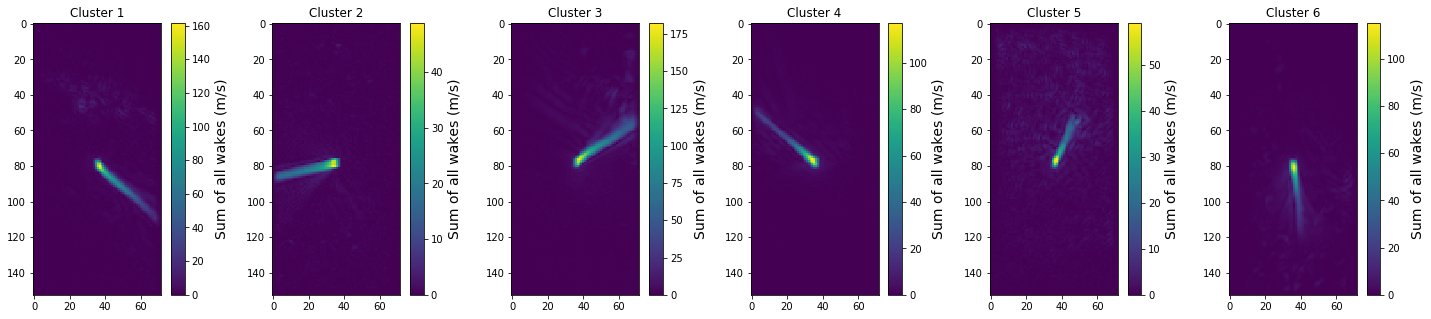

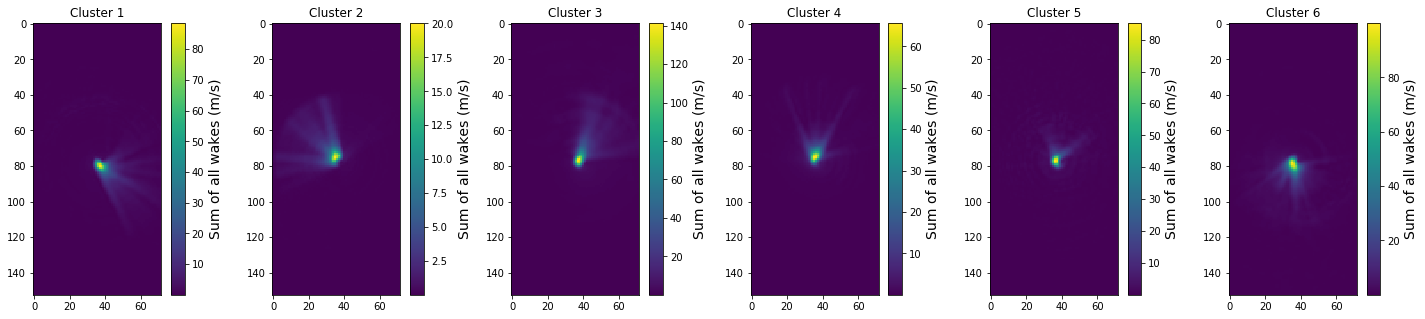

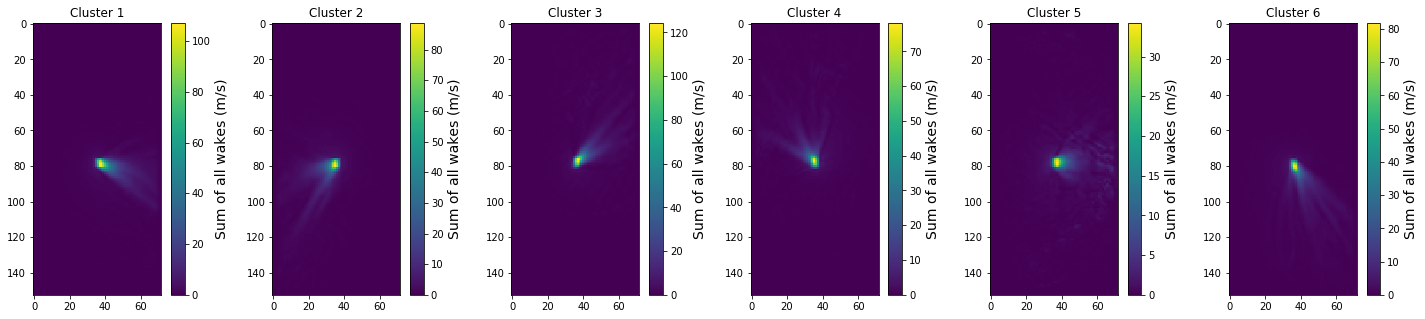

In [33]:
# plot downstream wake using simple approach

fig, ax = plt.subplots(1, 6, figsize = (25, 5))

im0 = ax[0].imshow(np.sqrt(u_cluster_0**2 + v_cluster_0**2))
cbar = plt.colorbar(im0, ax = ax[0])
cbar.set_label(r'Sum of all wakes (m/s)', fontsize =14)
ax[0].set_title('Cluster 1')
im1 = ax[1].imshow(np.sqrt(u_cluster_1**2 + v_cluster_1**2))
cbar = plt.colorbar(im1, ax = ax[1])
cbar.set_label(r'Sum of all wakes (m/s)', fontsize =14)
ax[1].set_title('Cluster 2')
im2 = ax[2].imshow(np.sqrt(u_cluster_2**2 + v_cluster_2**2))
cbar = plt.colorbar(im2, ax = ax[2])
cbar.set_label(r'Sum of all wakes (m/s)', fontsize =14)
ax[2].set_title('Cluster 3')
im3 = ax[3].imshow(np.sqrt(u_cluster_3**2 + v_cluster_3**2))
cbar = plt.colorbar(im3, ax = ax[3])
cbar.set_label(r'Sum of all wakes (m/s)', fontsize =14)
ax[3].set_title('Cluster 4')
im4 = ax[4].imshow(np.sqrt(u_cluster_4**2 + v_cluster_4**2))
cbar = plt.colorbar(im4, ax = ax[4])
cbar.set_label(r'Sum of all wakes (m/s)', fontsize =14)
ax[4].set_title('Cluster 5')
im5 = ax[5].imshow(np.sqrt(u_cluster_5**2 + v_cluster_5**2))
cbar = plt.colorbar(im5, ax = ax[5])
cbar.set_label(r'Sum of all wakes (m/s)', fontsize =14)
ax[5].set_title('Cluster 6')
#fig.tight_layout()
plt.show()

# plot downstream wake using weighted approach
fig, ax = plt.subplots(1, 6, figsize = (25, 5))

im0 = ax[0].imshow(np.sqrt(rotate_u_cluster_0**2 + rotate_v_cluster_0**2))
cbar = plt.colorbar(im0, ax = ax[0])
cbar.set_label(r'Sum of all wakes (m/s)', fontsize =14)
ax[0].set_title('Cluster 1')
im1 = ax[1].imshow(np.sqrt(rotate_u_cluster_1**2 + rotate_v_cluster_1**2))
cbar = plt.colorbar(im1, ax = ax[1])
cbar.set_label(r'Sum of all wakes (m/s)', fontsize =14)
ax[1].set_title('Cluster 2')
im2 = ax[2].imshow(np.sqrt(rotate_u_cluster_2**2 + rotate_v_cluster_2**2))
cbar = plt.colorbar(im2, ax = ax[2])
cbar.set_label(r'Sum of all wakes (m/s)', fontsize =14)
ax[2].set_title('Cluster 3')
im3 = ax[3].imshow(np.sqrt(rotate_u_cluster_3**2 + rotate_v_cluster_3**2))
cbar = plt.colorbar(im3, ax = ax[3])
cbar.set_label(r'Sum of all wakes (m/s)', fontsize =14)
ax[3].set_title('Cluster 4')
im4 = ax[4].imshow(np.sqrt(rotate_u_cluster_4**2 + rotate_v_cluster_4**2))
cbar = plt.colorbar(im4, ax = ax[4])
cbar.set_label(r'Sum of all wakes (m/s)', fontsize =14)
ax[4].set_title('Cluster 5')
im5 = ax[5].imshow(np.sqrt(rotate_u_cluster_5**2 + rotate_v_cluster_5**2))
cbar = plt.colorbar(im5, ax = ax[5])
cbar.set_label(r'Sum of all wakes (m/s)', fontsize =14)
ax[5].set_title('Cluster 6')
#fig.tight_layout()
plt.show()

# plot real downstream wake
fig, ax = plt.subplots(1, 6, figsize = (25, 5))

im0 = ax[0].imshow(np.sqrt(real_u_cluster_0**2 + real_v_cluster_0**2))
cbar = plt.colorbar(im0, ax = ax[0])
cbar.set_label(r'Sum of all wakes (m/s)', fontsize =14)
ax[0].set_title('Cluster 1')
im1 = ax[1].imshow(np.sqrt(real_u_cluster_1**2 + real_v_cluster_1**2))
cbar = plt.colorbar(im1, ax = ax[1])
cbar.set_label(r'Sum of all wakes (m/s)', fontsize =14)
ax[1].set_title('Cluster 2')
im2 = ax[2].imshow(np.sqrt(real_u_cluster_2**2 + real_v_cluster_2**2))
cbar = plt.colorbar(im2, ax = ax[2])
cbar.set_label(r'Sum of all wakes (m/s)', fontsize =14)
ax[2].set_title('Cluster 3')
im3 = ax[3].imshow(np.sqrt(real_u_cluster_3**2 + real_v_cluster_3**2))
cbar = plt.colorbar(im3, ax = ax[3])
cbar.set_label(r'Sum of all wakes (m/s)', fontsize =14)
ax[3].set_title('Cluster 4')
im4 = ax[4].imshow(np.sqrt(real_u_cluster_4**2 + real_v_cluster_4**2))
cbar = plt.colorbar(im4, ax = ax[4])
cbar.set_label(r'Sum of all wakes (m/s)', fontsize =14)
ax[4].set_title('Cluster 5')
im5 = ax[5].imshow(np.sqrt(real_u_cluster_5**2 + real_v_cluster_5**2))
cbar = plt.colorbar(im5, ax = ax[5])
cbar.set_label(r'Sum of all wakes (m/s)', fontsize =14)
ax[5].set_title('Cluster 6')
#fig.tight_layout()
plt.show()
